Student Performance In Exams


In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#READING THE FILE

df = pd.read_csv(r"D:\DATA SCIENCE\DATASETS\STUDENT PERFORMANCE IN EXAMS\StudentsPerformance.csv")

In [3]:
#GETTING THE TOP 5 VALUES

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#CHECKING THE SHAPE

print("Shape of the Dataset :",df.shape)

Shape of the Dataset : (1000, 8)


In [5]:
#CHECKING THE MISSING VALUES

print("ALL THE MISSING VALUES IN EACH FEATURE")
print("--------------------------------------")
df.isnull().sum()

ALL THE MISSING VALUES IN EACH FEATURE
--------------------------------------


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

THERE ARE NO MISSING VALUES IN THE DATASET

In [6]:
#CHECKING THE TOTAL NUMBER OF DUPLICATE VALUES

print("Total Number of Duplicate values in the dataset :",df.duplicated().sum())

Total Number of Duplicate values in the dataset : 0


THERE ARE NO DUPLICATE VALUES IN THE DATASET

In [7]:
#CHEKCING NULL AND DATATYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#CHECKING THE NUMBER OF UNIQUE VALUES IN EACH COLUMN

print("NUMBER OF UNIQUE VALUES IN EACH FEATURE")
print("--------------------------------------")
df.nunique()

NUMBER OF UNIQUE VALUES IN EACH FEATURE
--------------------------------------


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
#CHECKING STATISTICS OF THE DATASET

df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


FROM ABOVE DESCRIPTION OF THE NUMERICAL DATA, ALL MEANS ARE VERY CLOSE TO EACH OTHER

STANDARD DEVIATIONS ARE ALSO VERY TO EACH OTHER RANGES BETWEEN [14.6 to 15.19]

In [10]:
#GETTING ALL THE NUMERICAL CATEGORIES

print("All the Numerical Features of the dataset :",df.select_dtypes(include=["int64","float64"]).columns)

All the Numerical Features of the dataset : Index(['math score', 'reading score', 'writing score'], dtype='object')


In [11]:
#GETTING ALL THE CATEGORICAL CATEGORIES

print("All the Categorical Features of the dataset :",df.select_dtypes(include=["O"]).columns)

All the Categorical Features of the dataset : Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [12]:
#ADDING MORE COLUMNS AS TOTAL SCORE AND AVERAGE SCORE

df["Total Score"] = df["math score"] + df["reading score"] + df["writing score"]
df["Average Score"] = df["Total Score"]/3

NOW CONSIDERING MAINLY TOTAL SCORE AS THE DEPENDENT FEATURE 

In [13]:
#CHECKING THE ADDITION

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#NOW CHECKING ALL THE STUDENTS WHO GOT FULL MARKS IN THEIR FOLLOWING TEST

reading_full = df[df["reading score"] == 100]["Average Score"].count()
writing_full = df[df["writing score"] == 100]["Average Score"].count()
math_full = df[df["math score"] == 100]["Average Score"].count()

print("Number of Students Got Full marks in Maths :" ,math_full)
print("Number of Students Got Full marks in Reading :" ,reading_full)
print("Number of Students Got Full marks in writing :" ,writing_full)

Number of Students Got Full marks in Maths : 7
Number of Students Got Full marks in Reading : 17
Number of Students Got Full marks in writing : 14


In [15]:
#NOW CHECKING ALL THE STUDENTS WHO GOT LESS THAN 20 MARKS IN THEIR FOLLOWING TEST

reading_less = df[df["reading score"] <= 20]["Average Score"].count()
writing_less = df[df["writing score"] <= 20]["Average Score"].count()
math_less = df[df["math score"] <= 20]["Average Score"].count()

print("Number of Students Got less than 20 marks in Maths :" ,math_less)
print("Number of Students Got less than 20 marks in Reading :" ,reading_less)
print("Number of Students Got less than 20 marks in writing :" ,writing_less)

Number of Students Got less than 20 marks in Maths : 4
Number of Students Got less than 20 marks in Reading : 1
Number of Students Got less than 20 marks in writing : 3


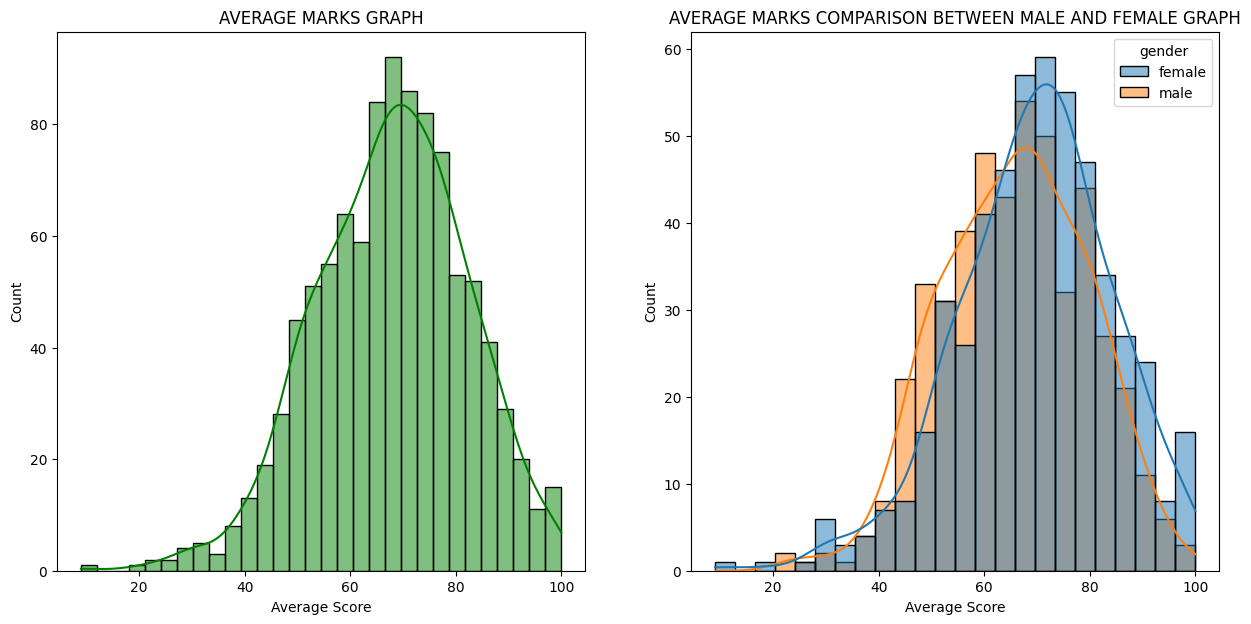

In [16]:
#HISTOGRAM COMPARISON AVERAGE MARKS

fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = "Average Score",bins = 30,kde = True, color = "g")
plt.title("AVERAGE MARKS GRAPH")
plt.subplot(122)
sns.histplot(data = df,x = "Average Score",kde = True, hue = "gender")
plt.title("AVERAGE MARKS COMPARISON BETWEEN MALE AND FEMALE GRAPH")
plt.show()


FEMALE STUDENTS TEND TO PERFORM WELL THEN MALE STUDENTS

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\18032198.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


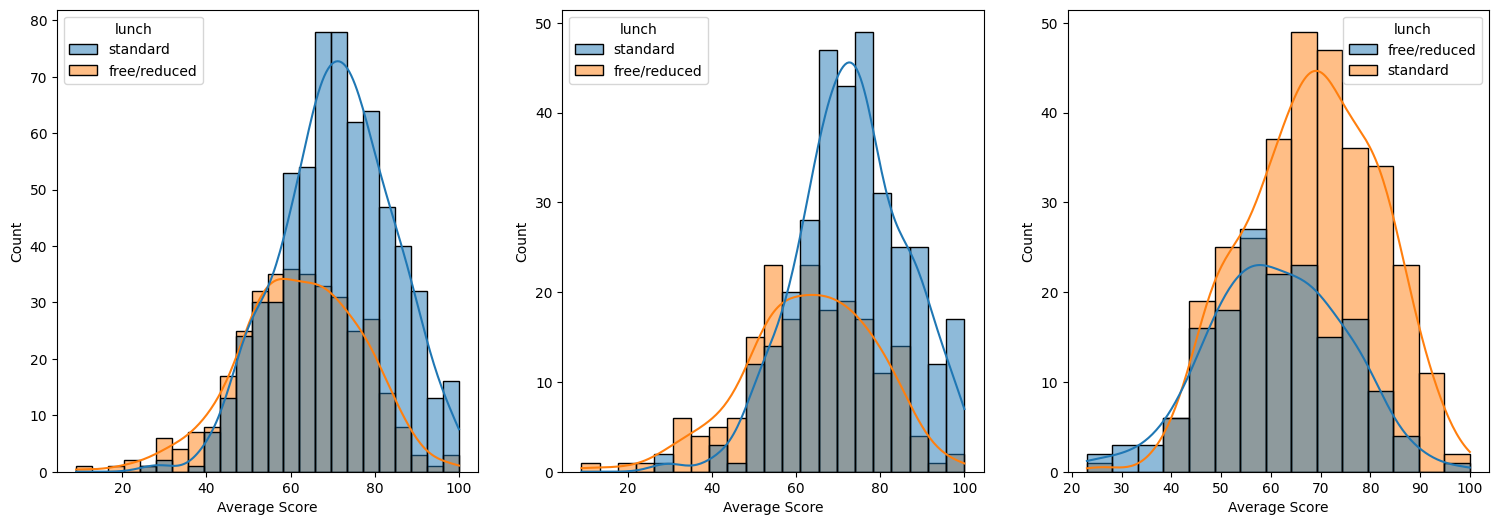

In [17]:
#HISTOGRAM COMPARISON AVERAGE MARKS OF LUNCH

fig, axs = plt.subplots(3,1, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = "Average Score",kde = True, hue = "lunch")

plt.subplot(142)
sns.histplot(data = df[df.gender == "female"],x = "Average Score",kde = True, hue = "lunch")

plt.subplot(143)
sns.histplot(data = df[df.gender == "male"],x = "Average Score",kde = True, hue = "lunch")

plt.show()

STANDARD LUNCH HELPS PERFORM WELL IN EXAMS 

STANDARD LUNCH HELPS PERFORM WELL IN EXAMS BE IT A MALE OR A FEMALE

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\2629954723.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\2629954723.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\2629954723.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


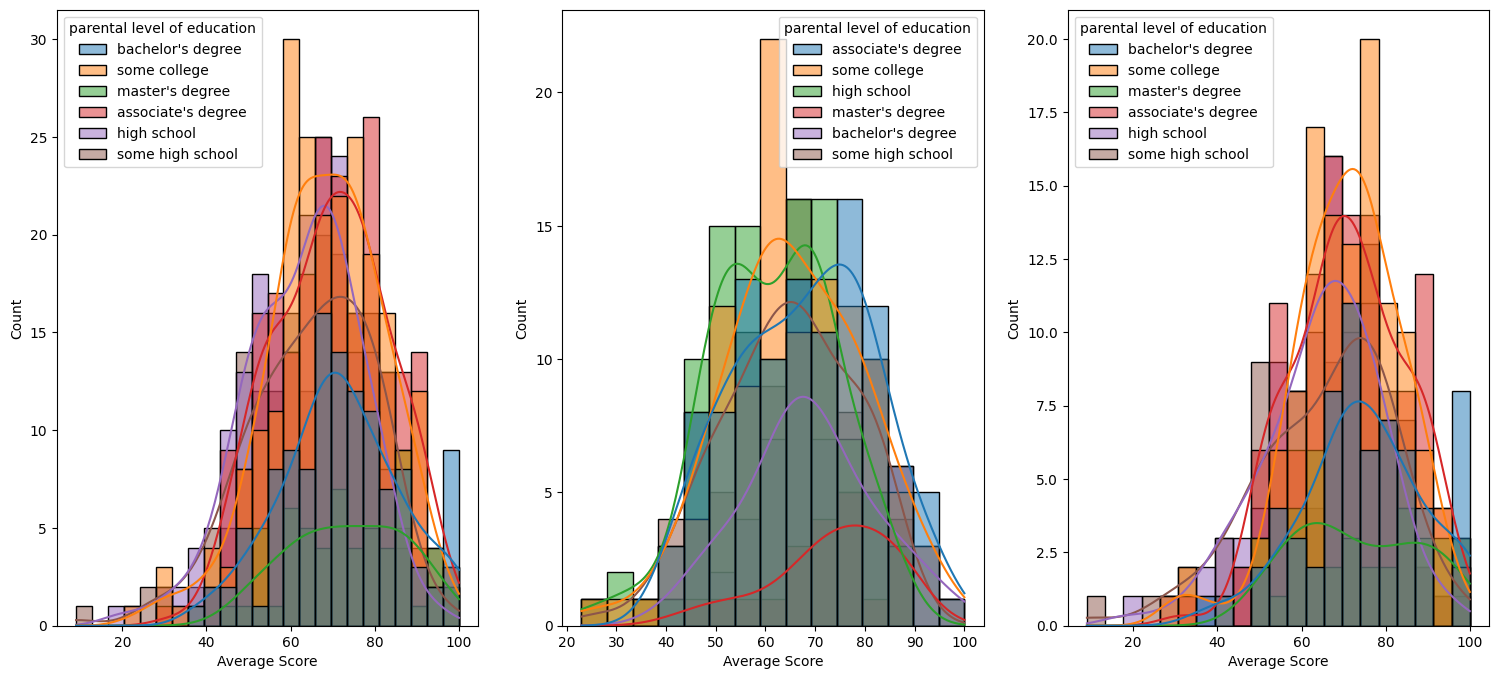

In [18]:
#HISTOGRAM COMPARISON AVERAGE MARKS OF PARENTAL LEVEL OF EDUCATION

plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average Score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='parental level of education')
plt.show()

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.




C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\3410403978.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\3410403978.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16944\3410403978.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


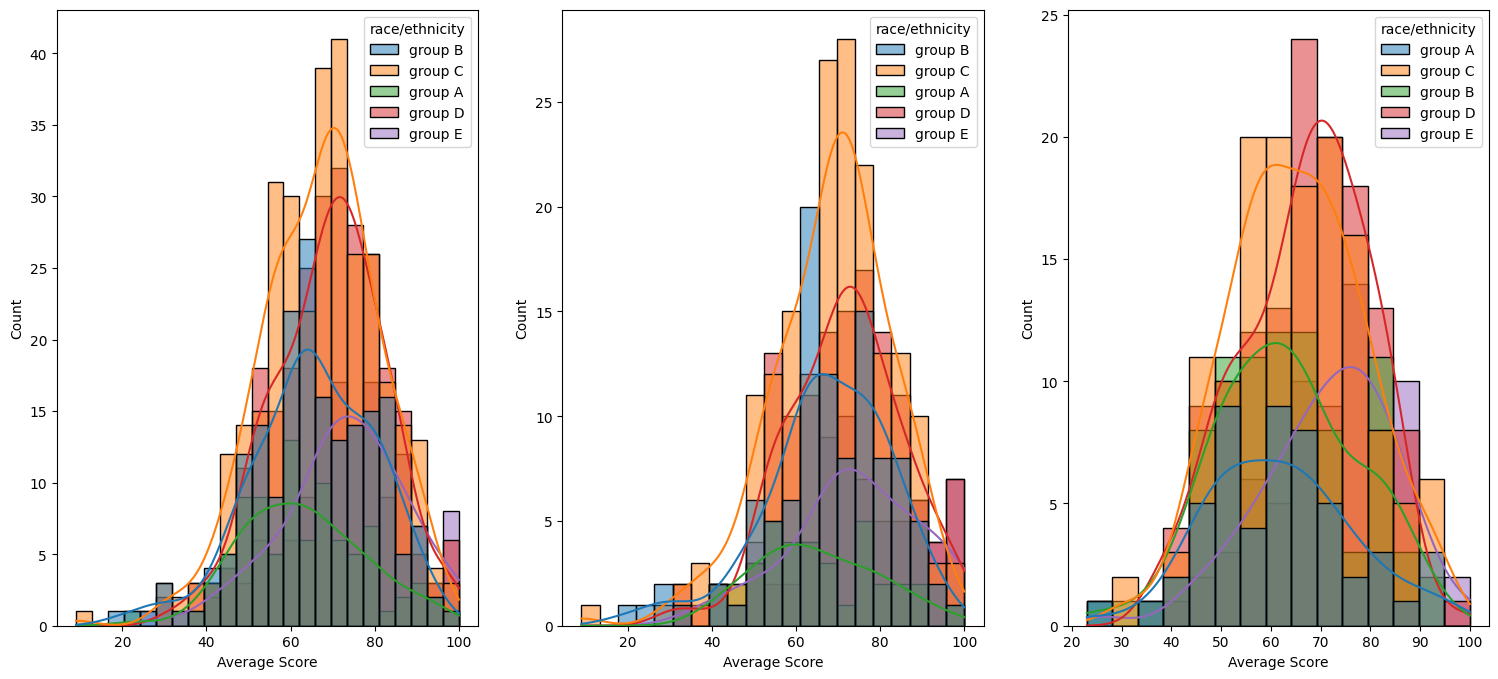

In [19]:
#HISTOGRAM COMPARISON AVERAGE MARKS OF RACE/ETHNICITY

plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average Score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='race/ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


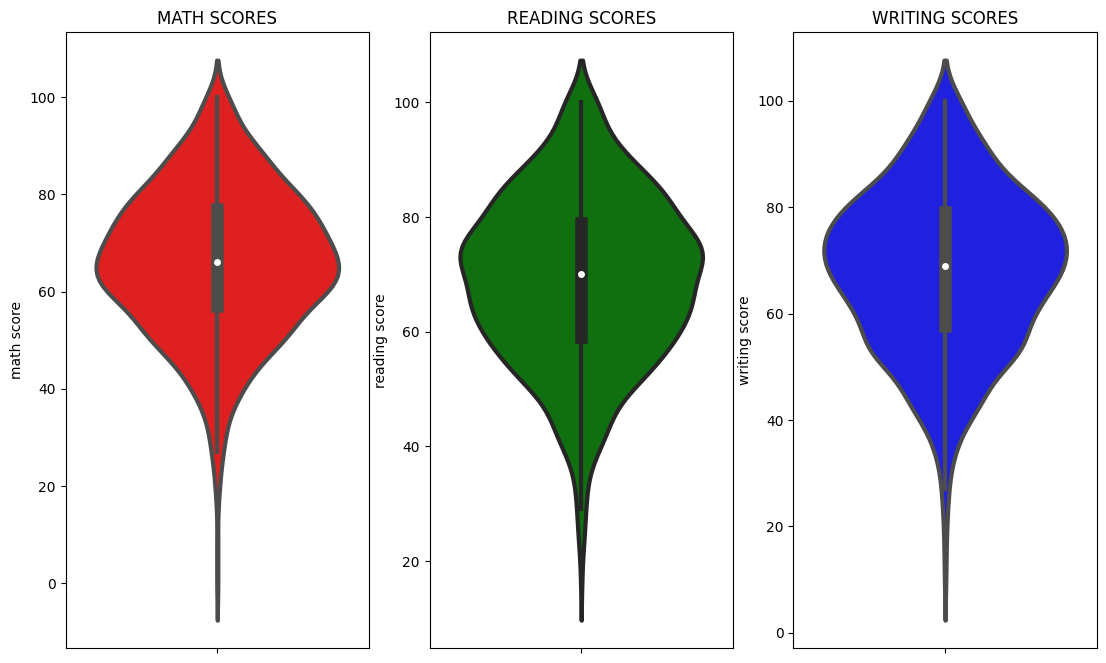

In [20]:
#MAXIMUM SCORE OF STUDENTS IN ALL THREE SUBJECTS

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()


From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


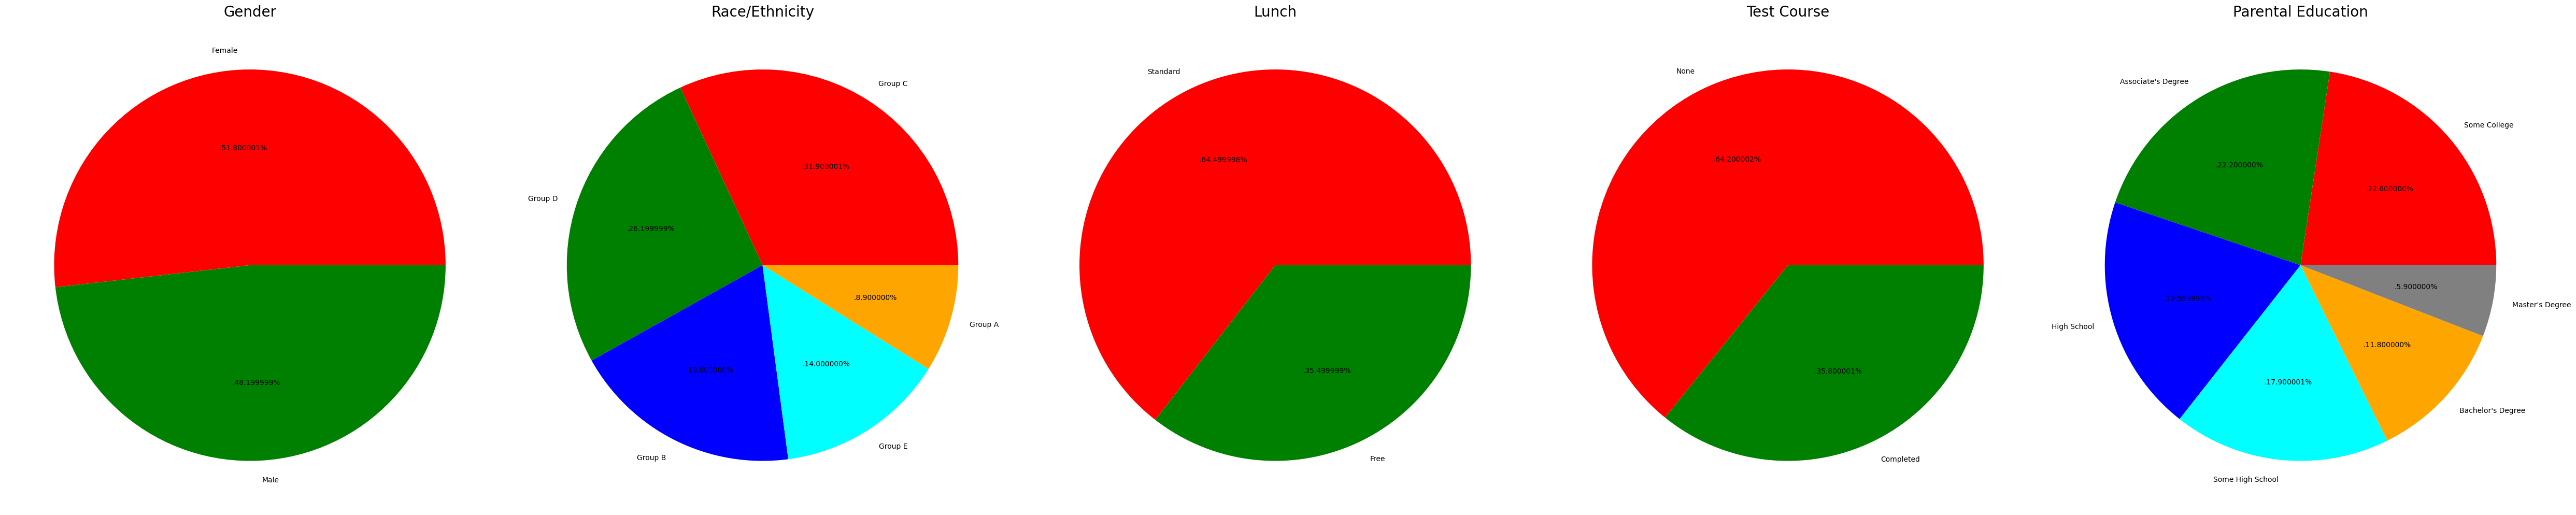

In [21]:
#MULTIVARIATE ANALYSIS USING PIEPLOT

plt.rcParams['figure.figsize'] = (50, 50)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

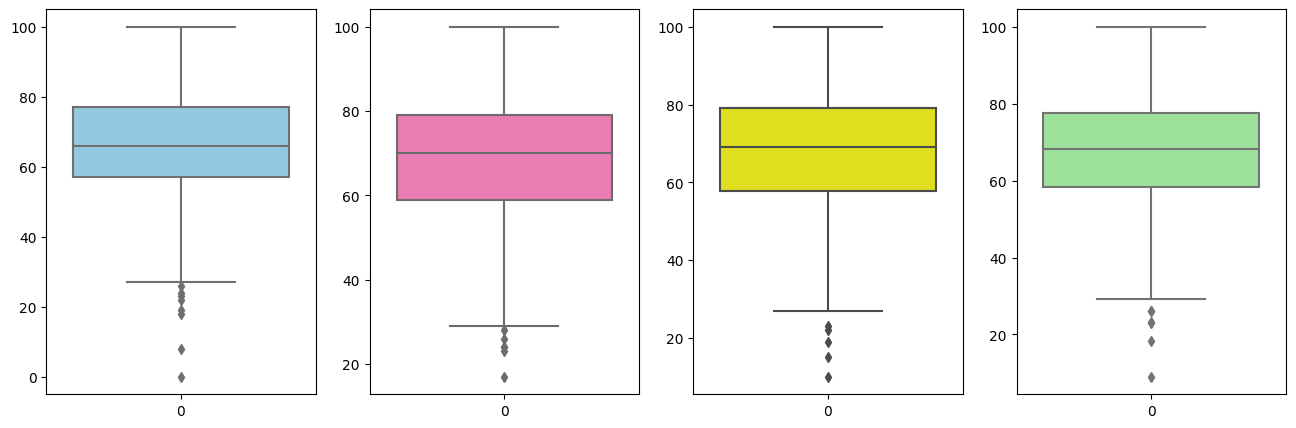

In [22]:
#CHECKING OUTLIER

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Score'],color='lightgreen')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


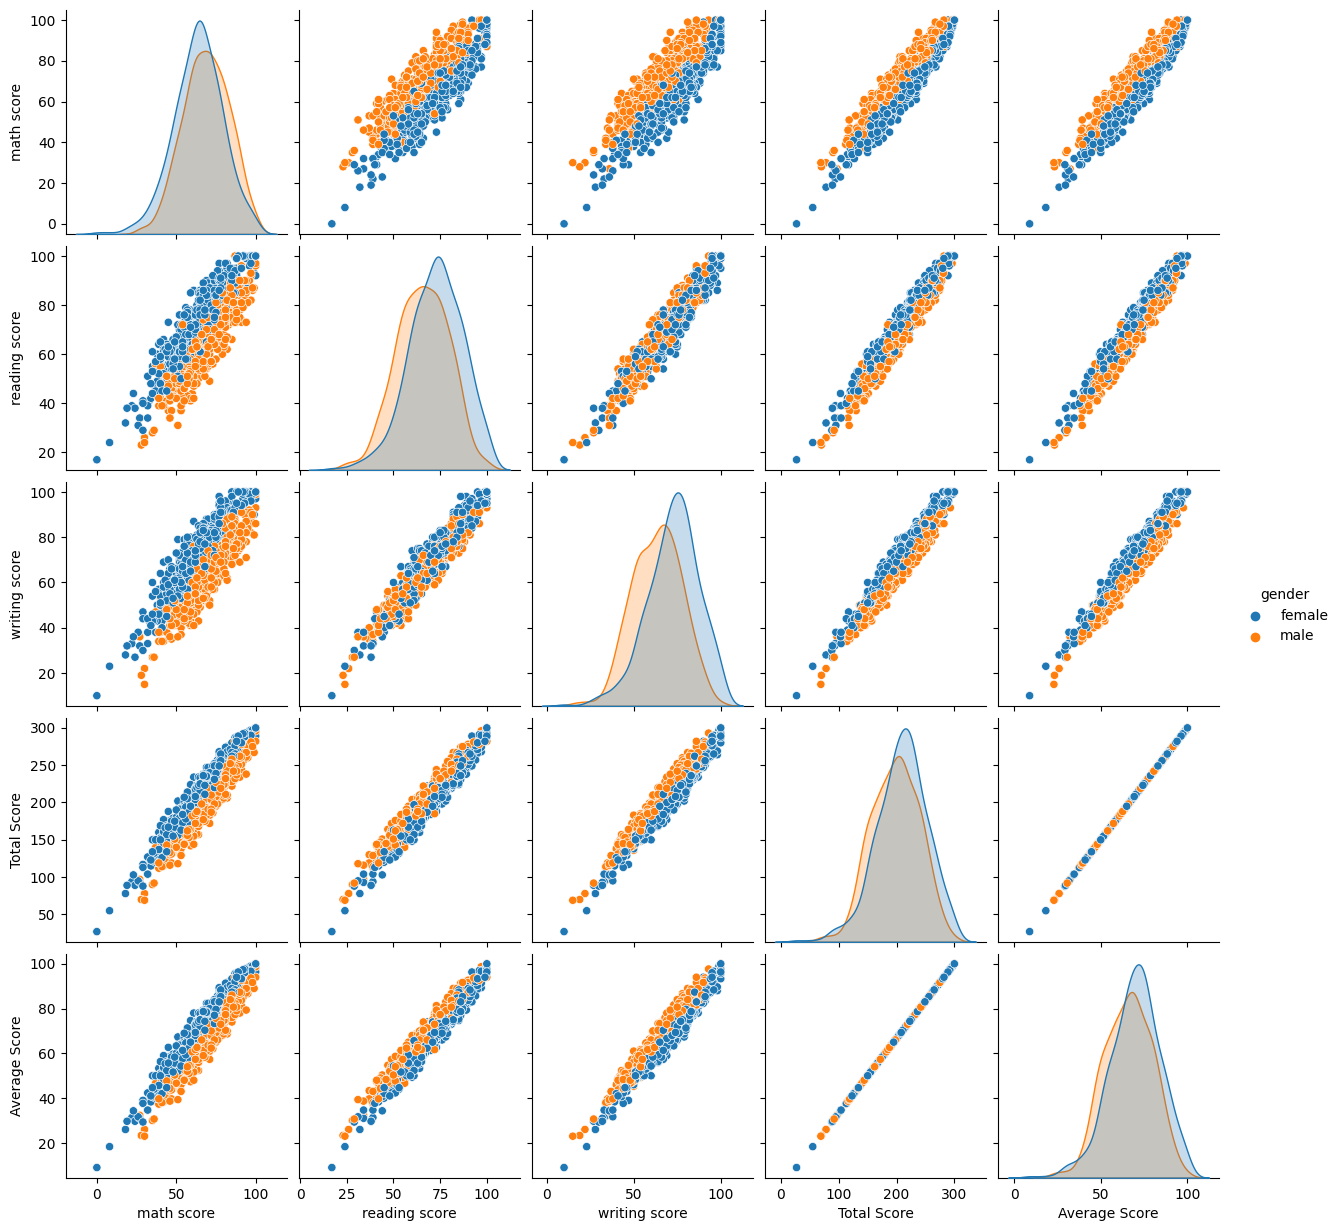

In [23]:
#MULTIVARIATE ANALYSIS USING PAIRPLOT

sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.

                              CONCLUSIONS
------------------------------------------------------------------------------

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.

In [24]:
#PREPARINIG X AND Y VARIABLE

X = df.drop(columns=["math score"],axis=1)
y = df["math score"]

In [25]:
print("Checking Y Variable")
print("-------------------")
y

Checking Y Variable
-------------------


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [26]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [27]:
X = preprocessor.fit_transform(X)

In [28]:
#CHECKING THE SHAPE OF THE DATASET

print("Shape of the Dataset :",X.shape)

Shape of the Dataset : (1000, 21)


In [29]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of the X Train dataset :", X_train.shape) 
print("Shape of the X test dataset :", X_test.shape)

print("Shape of the y Train dataset :", y_train.shape)
print("Shape of the y Test dataset :",y_test.shape)

Shape of the X Train dataset : (800, 21)
Shape of the X test dataset : (200, 21)
Shape of the y Train dataset : (800,)
Shape of the y Test dataset : (200,)
